<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/ML_02_LinearRegression_1_%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression - 1

#### 최소제곱법(Ordinary Least Squares)

In [1]:
import numpy as np
# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30, 40])

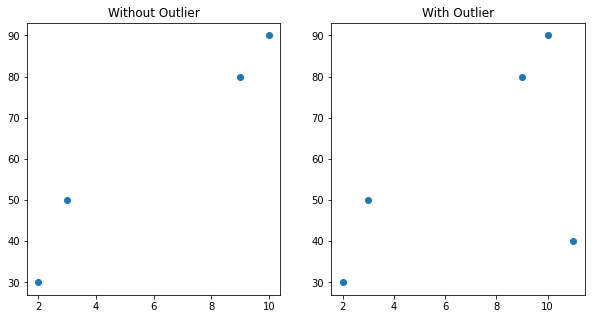

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [3]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean()) ** 2)
    b = y.mean() - w * x.mean()
    return w, b

In [4]:
w1, b1 = OLS(x1, y1)
w1, b1

(6.6, 22.900000000000006)

In [5]:
w2, b2 = OLS(x2, y2)
w2, b2

(3.4285714285714284, 34.0)

In [6]:
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

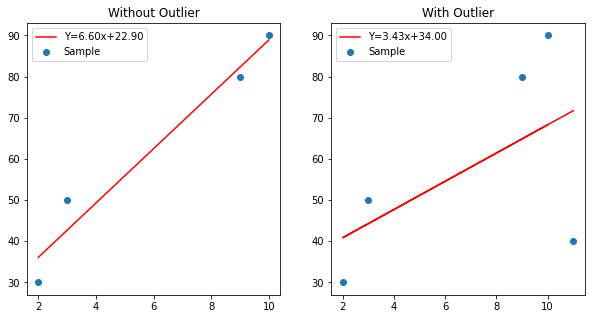

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.legend()
plt.title('With Outlier')
plt.show()

In [8]:
# sciket - Learn 사용
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
model1.coef_, model1.intercept_

(array([6.6]), 22.899999999999977)

In [9]:
# sciket - Learn 사용
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

#### 2. 경사하강법

In [ ]:
"""
learning_rate(학습률), iteration(반복횟수보다 많이 반복되면 멈추자), 0.005(특정값보다 작은 기울기를 만나면 멈추자)
"""

In [15]:
np.random.seed(1)
a = np.random.randn(50)
a.mean(), a.std()

(-0.02551484800765029, 0.969589282958136)

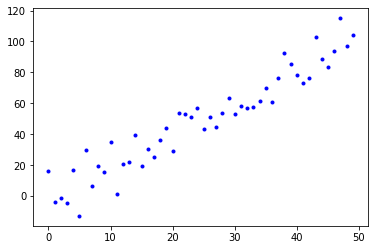

In [16]:
np.random.seed(1)
X = np.arange(50)
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')
plt.show()

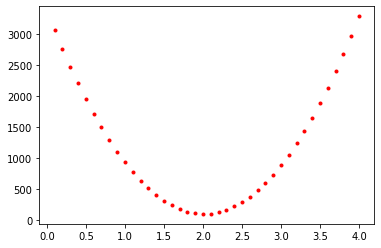

In [17]:
w_range = np.arange(0.1, 4.1, 0.1)
costs = []
for w in w_range:
    h = w * X
    cost = 1 / 50 * np.sum((h-Y) ** 2) #h:예상값, Y:실제값
    costs.append(cost)
plt.plot(w_range, costs, 'r.')
plt.show()

In [18]:
len(w_range), w_range[20]
w1 = w_range[:20]
c1 = costs[:20] 

In [19]:
w1, c1

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 [3054.6926001606057,
  2753.340644284238,
  2468.1586884078697,
  2199.1467325315016,
  1946.3047766551338,
  1709.6328207787653,
  1489.1308649023972,
  1284.798909026029,
  1096.6369531496612,
  924.6449972732931,
  768.823041396925,
  629.1710855205567,
  505.68912964418865,
  398.3771737678208,
  307.2352178914526,
  232.26326201508473,
  173.46130613871662,
  130.8293502623486,
  104.3673943859806,
  94.07543850961257])

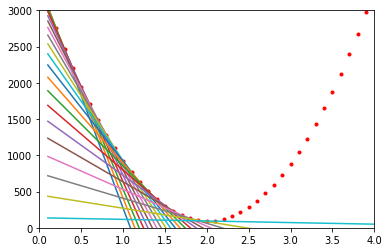

In [20]:
plt.plot(w_range, costs, 'r.')
for w, cost in zip(w1, c1):
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X ) 
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show()

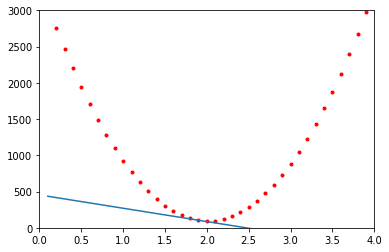

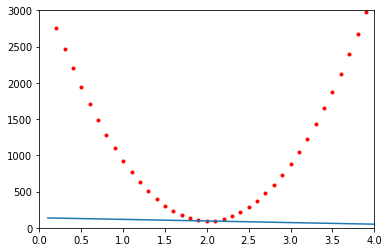

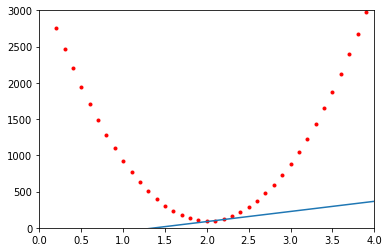

In [21]:

for w, cost in zip(w_range[18:21], costs[18:21]):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X )
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show()